In [1]:
import numpy as np
import operator
from sklearn.datasets.mldata import fetch_mldata
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Download the data

In [2]:
mnist = fetch_mldata('MNIST original')
data = mnist['data']
labels= mnist['target']

In [5]:
idx = np.random.RandomState(0).choice(70000, 11000, replace = False)
train = data[idx[:10000], :].astype(int)
train_labels = labels[idx[:10000]]
test = data[idx[10000:], :].astype(int)
test_labels = labels[idx[10000:]]

### (a) Implementation of k-NN algorithm

In [6]:
def euclidean_dist(x,y):   
    '''euclidian dist between x and y'''
    return np.sum(np.power(x-y,2))

In [7]:
def k_neighbors_index(q, mat, k):
    '''get q_image, train data and k parameter returns k nearest images`  indexes '''
    dist = []
    for x in mat:
        toAdd = euclidean_dist(q,x)
        dist.append(toAdd)
    dist = np.array(dist)
    # sort distance by their index, thus returns the k nearest indexes
    dist = np.argsort(dist)[:k]
    return dist

In [8]:
def label_index(labels):
    ''' create tuples of (label, count) sorted by the counter'''
    ind = np.unique(labels, return_counts=True)
    pairs = zip(ind[0], ind[1])
    pairs.sort(key=operator.itemgetter(1))
    return pairs.pop()[0]
# return pairs

In [9]:
def knn_model_gen(images, labels_vec, q_image, k):
    '''gets training set, labels of the training set, questionable image and k
    returns the closest label to the questionable image'''
    # get k nearest indexes
    ind = k_neighbors_index(q_image, images, k)
    neigh_label = labels_vec[ind]
    # aggregate to create a dictionary of <label, instances>
    return label_index(neigh_label)

### (b) Run k-NN on test data

In [29]:
n=1000
k=10

train_set = train[:n,]
train_set_labels = train_labels[:n]
loss =0
for row in range(0,len(test)):
    test_labels[row]
    pred = knn_model_gen(train_set, train_set_labels, test[row], k)
    if test_labels[row] != pred:
        loss +=1
acc = round(1.0-loss*1.0/len(test),5)
print 'the accuracy of the prediction is ', acc

the accuracy of the prediction is  0.832


A completely random predictor will predict according to the proportion of the labels.  
We can see in the following cell that the labels in our training set are approximatly uniform distributed.  
Thus, a random predictor will cause in 90% bad prediction, which means accuracy of ~10%.  
The KNN predictor acts pretty much the same and has no major advantage over it.

In [30]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([ 996, 1141, 1040, 1013,  962,  863,  989, 1064,  963,  969], dtype=int64))

### (c) Plotting the accuracy as a function of k

In [32]:
k_min, k_max= 1, 100
n=1000

k_loss = {}
images=train[:n]
k_range = xrange(k_max, k_min-1, -1)
for row in range(0,len(test)):
    # create one time the k nearest images, and each iteration take the needed first k
    k_list = k_neighbors_index(test[row], images, k_max)
    for k in k_range:
        closest_ind = k_list[:k]
        best= label_index(train_labels[closest_ind])
        if test_labels[row] != best:
            if k_loss.has_key(k):
                k_loss[k] +=1
            else:
                k_loss[k] = 1

best accuracy is  0.873 with k =  3


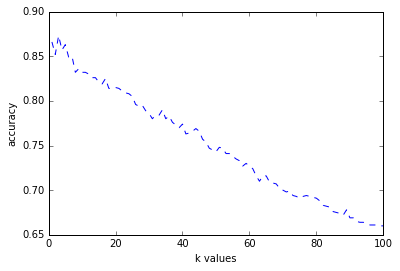

In [34]:
### Print accuracy as a function of k

acc = list(k_loss.values())
k_vals = list(k_loss)
acc = map(lambda x:1.0-x*1.0/len(test),acc)
ax = plt.plot(k_vals, acc, '--')
plt.xlabel('k values')
plt.ylabel('accuracy')
print 'best accuracy is ', round(max(acc),3),  'with k = ',acc.index(max(acc))+1

### (d) Plotting accuracy as a function of n

In [35]:
# k_best = acc.index(max(acc))+1
# def loss_on_n(train, train_labels, test, test_labels, k_best = 5, n_max = 5000, n_min = 100):
k_best = 5
n_max = 5000
n_min = 100

n_loss = {}
images=train[:n_max]
n_range = range(n_max, 0, -100)
for row in range(0,len(test)):
    # create one time the k nearest per each test sample
    k_list = k_neighbors_index(test[row], images[:n_max], n_max)
    filtered = k_list
    for cur_n in n_range:
        if cur_n != n_min: # filter so the k nearest images are existing in the new current training set
            filtered = filter(lambda x: x not in range(cur_n-100,cur_n+1),filtered)
        closest_ind = filtered[:k_best]
        best = label_index(train_labels[closest_ind])
        if test_labels[row] != best:
            if n_loss.has_key(cur_n):
                n_loss[cur_n] +=1
            else:
                n_loss[cur_n] = 1


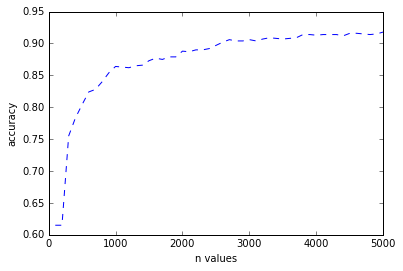

In [37]:
### print accuracy of several n
t_len = len(test)
list1, list2 = (list(t) for t in zip(*sorted(zip(list(n_loss), list(n_loss.values())))))
n_vals, acc = (list(t) for t in zip(*sorted(zip(list(n_loss), list(n_loss.values())))))
acc = map(lambda x:1-x*1.0/t_len,acc)
plt.plot(n_vals, acc, '--')
plt.xlabel('n values')
plt.ylabel('accuracy')